# TAREA 1: "La temida influenza" por Ignacio Santiago Medina Díaz

Para comenzar con la primera tarea del curso, se comenzara a modelar el problema, identificando sus variables, dominio, restricciones y su función objetivo.



## Identificando Datos Iniciales

Primero importaremos Time para poder medir el tiempo que se demora al encontrar la solución óptima.

In [1]:
import time

1. Se comenzará definiendo las variables, en este caso, las comunas dentro de un Arreglo 1x15.

In [2]:
# Lista de comunas de la región de Brisketiana C[1,15]
comunas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Lista de Variables (representa la decisión de contruir o no un centro de vacunación)
variables = [f"C{comuna}" for comuna in comunas]
print("Variables:", variables)

Variables: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']


2. Definimos el dominio para el problema. Para este caso, el dominio es Binario, siendo:
    - 0 : NO se construye un centro en la comuna.
    - 1 : SI se construye un centro en la comuna.

In [3]:
dominios = {f"C{comuna}": [0, 1] for comuna in comunas}
print(f"Dominio de cada comuna de la región: ")
for comuna in dominios:
    print(f"{comuna}: {dominios[comuna]}")


Dominio de cada comuna de la región: 
C1: [0, 1]
C2: [0, 1]
C3: [0, 1]
C4: [0, 1]
C5: [0, 1]
C6: [0, 1]
C7: [0, 1]
C8: [0, 1]
C9: [0, 1]
C10: [0, 1]
C11: [0, 1]
C12: [0, 1]
C13: [0, 1]
C14: [0, 1]
C15: [0, 1]


---
Con esta información, podemos identificar el espacio de busqueda del COP. El problema involucra 15 comunas, y para cada una de ellas se debe tomar una decisión: construir un centro de vacunación (representado como 1) o no construirlo (representado como 0). Esto implica que cada comuna tiene 2 opciones posibles. Dado que las decisiones son independientes para cada comuna y hay 15 en total, el número de posibles combinaciones de decisiones se calcula como: 2^15 = 32.768

Por lo tanto, el espacio de búsqueda del COP está compuesto por 32,768 posibles combinaciones. Cada una de estas combinaciones representa una asignación distinta de valores binarios (0 o 1) a las 15 comunas, es decir, una posible configuración de dónde se construyen los centros de vacunación.

---



3. Definimos los costos por comuna siendo este un valor a tomar en cuenta para minimizar la funcion y obtener la solución óptima.

In [4]:
costos = {
    "C1": 60, "C2": 30, "C3": 60, "C4": 70, "C5": 130,
    "C6": 60, "C7": 70, "C8": 60, "C9": 80, "C10": 70, 
    "C11": 50, "C12": 90, "C13": 30, "C14": 30, "C15": 100
}
print("Costos de construccion de centro de vacunación por cada comunas: ")
for comuna in costos:
    print(f"{comuna}: {costos[comuna]}")


Costos de construccion de centro de vacunación por cada comunas: 
C1: 60
C2: 30
C3: 60
C4: 70
C5: 130
C6: 60
C7: 70
C8: 60
C9: 80
C10: 70
C11: 50
C12: 90
C13: 30
C14: 30
C15: 100


4. Realizamos el diccionario para indicar la cobertura que satisface el crear un centro medico en cada una de ellas. Hay que tomar en cuenta que la cobertura satisface a cada comuna y a si misma.

In [5]:
cobertura = {
    "C1": ["C1", "C2", "C3", "C4", "C13"],
    "C2": ["C2", "C1", "C4", "C12", "C15"],
    "C3": ["C3", "C1", "C4", "C5", "C6", "C13"],
    "C4": ["C4", "C1", "C2", "C3", "C5", "C12"],
    "C5": ["C5", "C3", "C4", "C6", "C7", "C8", "C9", "C12"],
    "C6": ["C6", "C3", "C5", "C9"],           
    "C7": ["C7", "C5", "C8", "C10", "C11", "C12", "C14", "C15"],      
    "C8": ["C8", "C5", "C7", "C9", "C10"],
    "C9": ["C9", "C5", "C6", "C8", "C10", "C11"],
    "C10": ["C10", "C7", "C8", "C9", "C11"],
    "C11": ["C11", "C7", "C9", "C10", "C14"],
    "C12": ["C12", "C2", "C4", "C5", "C7", "C15"],
    "C13": ["C13", "C1", "C3"],
    "C14": ["C14", "C7", "C11", "C15"],
    "C15": ["C15", "C2", "C7", "C12", "C14"]        
}
print("Cantidad de comunas cubiertas por cada comuna: ")
for comuna in cobertura:
    cantidad = len(cobertura[comuna])
    print(f"{comuna}: {cantidad} comunas - {cobertura[comuna]}")

Cantidad de comunas cubiertas por cada comuna: 
C1: 5 comunas - ['C1', 'C2', 'C3', 'C4', 'C13']
C2: 5 comunas - ['C2', 'C1', 'C4', 'C12', 'C15']
C3: 6 comunas - ['C3', 'C1', 'C4', 'C5', 'C6', 'C13']
C4: 6 comunas - ['C4', 'C1', 'C2', 'C3', 'C5', 'C12']
C5: 8 comunas - ['C5', 'C3', 'C4', 'C6', 'C7', 'C8', 'C9', 'C12']
C6: 4 comunas - ['C6', 'C3', 'C5', 'C9']
C7: 8 comunas - ['C7', 'C5', 'C8', 'C10', 'C11', 'C12', 'C14', 'C15']
C8: 5 comunas - ['C8', 'C5', 'C7', 'C9', 'C10']
C9: 6 comunas - ['C9', 'C5', 'C6', 'C8', 'C10', 'C11']
C10: 5 comunas - ['C10', 'C7', 'C8', 'C9', 'C11']
C11: 5 comunas - ['C11', 'C7', 'C9', 'C10', 'C14']
C12: 6 comunas - ['C12', 'C2', 'C4', 'C5', 'C7', 'C15']
C13: 3 comunas - ['C13', 'C1', 'C3']
C14: 4 comunas - ['C14', 'C7', 'C11', 'C15']
C15: 5 comunas - ['C15', 'C2', 'C7', 'C12', 'C14']


## Algoritmo de Backtracking con Forward Checking (sin heurística)

Se implementara un algoritmo de busqueda con backtracking y forward checking. En otras palabras, con "backtracking" explorará el espacio de soluciones, retrocediendo cuando una rama no lleva una solución valida. Por otro lado, "forward checking" ayudara a verificar las restricciones futuras para encontrar el mejor espacio de busqueda mas rapido.

En el algoritmo, en caso de tener todas las comunas cubiertas, comparará con la mejor solución actual y la actualizará en el caso de ser mejor. En el caso de que no queden variables por asignar, termina la busqueda.

Hay que tener en cuenta que para cada variable, prueba asignarle 1 (construir) y 0 (no construir), verificando que las restricciones de cobertura se mantengan.

In [6]:
def backtracking_sin_heuristica(asignacion, variables_no_asignadas, S_j, costo_actual, mejor_solucion, mejor_costo):
    if not S_j:  # Si todas las comunas están cubiertas
        if costo_actual < mejor_costo[0]:
            mejor_solucion[0] = asignacion.copy()
            mejor_costo[0] = costo_actual
        return

    if not variables_no_asignadas:  # Si no quedan variables por asignar
        return

    Ci = variables_no_asignadas[0]  # Tomamos la primera variable no asignada
    nuevas_variables = variables_no_asignadas[1:]

    # Asignar Ci = 1 (construir)
    asignacion[Ci] = 1
    nuevo_S_j = {Cj: S_j[Cj].copy() for Cj in S_j if Cj not in cobertura[Ci]}
    backtracking_sin_heuristica(asignacion, nuevas_variables, nuevo_S_j, costo_actual + costos[Ci], mejor_solucion, mejor_costo)

    # Asignar Ci = 0 (no construir)
    asignacion[Ci] = 0
    nuevo_S_j = {Cj: S_j[Cj].copy() for Cj in S_j}
    consistente = True
    for Cj in cobertura[Ci]:
        if Cj in nuevo_S_j:
            nuevo_S_j[Cj].remove(Ci)
            if not nuevo_S_j[Cj]:
                consistente = False
                break
    if consistente:
        backtracking_sin_heuristica(asignacion, nuevas_variables, nuevo_S_j, costo_actual, mejor_solucion, mejor_costo)
    
    del asignacion[Ci]  # Limpiar asignación para backtracking

En este segundo apartado, almacenaremo las decisiones tomadas, agregando 1 o 0 para cada variable dependiendo de su restricción indicando en cada una de ellas que centros pueden cubrir cada comuna, con el fin de encontrar la mejor solución (empezando en NONE) y el mejor costro entre cada una de ellas (emprezando en 0).


In [7]:
asignacion = {}
variables_no_asignadas = variables.copy()  # Lista para mantener el orden
S_j = {f"C{j}": {Ci for Ci in variables if f"C{j}" in cobertura[Ci]} for j in comunas}
mejor_solucion = [None]
mejor_costo = [float('inf')]

A su vez inicializamos en tiempo de inicio antes de ejecutar el algoritmo.

In [8]:
tiempo_inicio = time.time()

Por ultimo, ejecutamos el algoritmo y finalmente calculamos el tiempo transcurrido al iniciar y finalizar la ejecución. Finalmente imprimimos los resultados obtenidos.

In [9]:
backtracking_sin_heuristica(asignacion, variables_no_asignadas, S_j, 0, mejor_solucion, mejor_costo)

tiempo_fin = time.time()
tiempo_ejecucion = tiempo_fin - tiempo_inicio

print("Mejor solución encontrada (sin heurística):")
for Ci, valor in mejor_solucion[0].items():
    if valor == 1:
        print(f"Construir en {Ci} (costo: {costos[Ci]})")
print(f"\n-> Costo total: '{mejor_costo[0]}'")
print(f"-> Tiempo de ejecución: '{tiempo_ejecucion:4f}' segundos")

Mejor solución encontrada (sin heurística):
Construir en C2 (costo: 30)
Construir en C9 (costo: 80)
Construir en C13 (costo: 30)
Construir en C14 (costo: 30)

-> Costo total: '170'
-> Tiempo de ejecución: '0.018036' segundos


## Algoritmo con Heuristica con el Algoritmo Greedy Determinista (con heurística)

La tecnica propuesta utilizando algoritmos con heuristica, fue el algoritmo Greedy Determinista, ya que, en cada iteración, siempre selecciona la opcion que maximiza la heuristica de manera predecible y sin introducir aleatoriedad, por lo tanto el resultado obtenido siempre sera el mismo para un conjunto dado de datos, en este caso por comunas, cobertura y costos.

In [10]:
def greedy_cobertura(variables, costos, cobertura):
    # Conjunto de comunas no cubiertas
    no_cubiertas = set(variables)
    # Solución: comunas donde se construirán centros
    solucion = {}
    costo_total = 0

    while no_cubiertas:
        mejor_comuna = None
        mejor_eficiencia = -1

        # Evaluamos cada comuna candidata
        for comuna in variables:
            if comuna not in solucion:  # Solo comunas no seleccionadas
                cubre_nuevas = [c for c in cobertura[comuna] if c in no_cubiertas]
                num_cubre_nuevas = len(cubre_nuevas)
                if num_cubre_nuevas > 0:
                    eficiencia = num_cubre_nuevas / costos[comuna]
                    if eficiencia > mejor_eficiencia:
                        mejor_eficiencia = eficiencia
                        mejor_comuna = comuna
                        mejores_cubre_nuevas = cubre_nuevas

        # Seleccionamos la mejor comuna
        solucion[mejor_comuna] = 1
        costo_total += costos[mejor_comuna]
        # Actualizamos las comunas no cubiertas
        for c in mejores_cubre_nuevas:
            no_cubiertas.remove(c)

    return solucion, costo_total



Finalmente, repetimos el mismo paso que el algoritmo anterior, ejecutando el algoritmo y mostrar sus resultados junto con el tiempo de ejecución.

In [11]:
# Ejecutamos el algoritmo
tiempo_inicio = time.time()

solucion, costo = greedy_cobertura(variables, costos, cobertura)

tiempo_fin = time.time()
tiempo_ejecucion_2 = tiempo_fin - tiempo_inicio

# Mostramos los resultados
print("Solución Greedy:")
for comuna in solucion:
    print(f"Construir en {comuna} (costo: {costos[comuna]})")
print(f"\n-> Costo total: '{costo}'")
print(f"-> Tiempo de ejecución: '{tiempo_ejecucion_2:4f}'segundos")

Solución Greedy:
Construir en C2 (costo: 30)
Construir en C11 (costo: 50)
Construir en C3 (costo: 60)
Construir en C8 (costo: 60)

-> Costo total: '200'
-> Tiempo de ejecución: '0.000097'segundos


Para finalizar, vamos a presentar ambos resultados para ver sus comparaciones visualmente graficamente.

In [12]:
# Configuración para poder realizar la grafica!
%pip install matplotlib numpy
%matplotlib inline


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


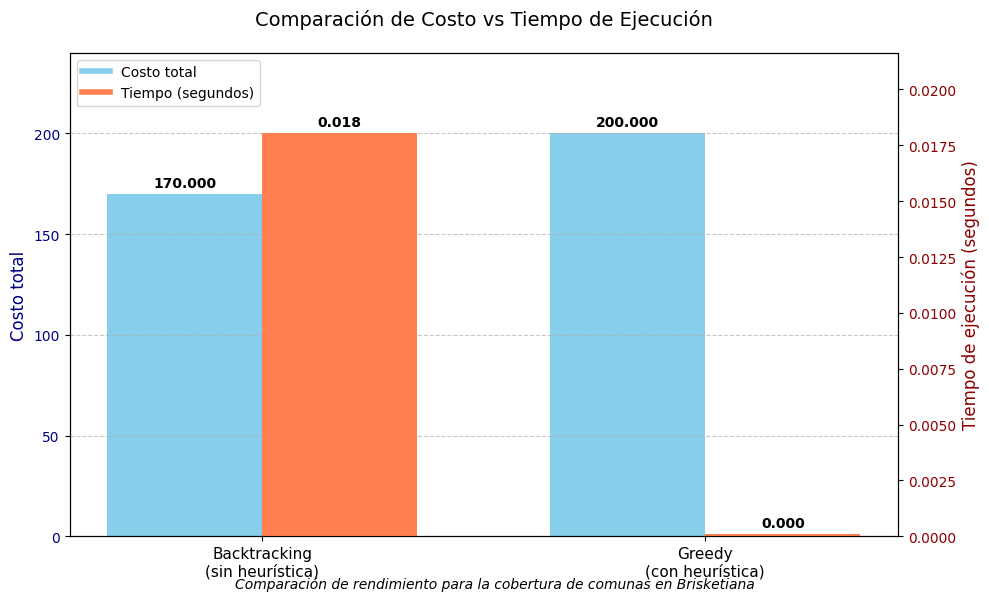

In [13]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax1 = plt.subplots(figsize=(10, 6))


algoritmos = ['Backtracking\n(sin heurística)', 'Greedy\n(con heurística)']
x = np.arange(len(algoritmos))
width = 0.35


rects1 = ax1.bar(x - width/2, [mejor_costo[0], costo], width, label='Costo', color='skyblue')
ax1.set_ylabel('Costo total', fontsize=12, color='navy')
ax1.set_ylim(0, max(mejor_costo[0], costo) * 1.2)
ax1.tick_params(axis='y', labelcolor='navy')


ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, [tiempo_ejecucion, tiempo_ejecucion_2], width, label='Tiempo', color='coral')
ax2.set_ylabel('Tiempo de ejecución (segundos)', fontsize=12, color='darkred')
ax2.set_ylim(0, max(tiempo_ejecucion, tiempo_ejecucion_2) * 1.2)
ax2.tick_params(axis='y', labelcolor='darkred')


def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

# Configurar eje x
ax1.set_xticks(x)
ax1.set_xticklabels(algoritmos, fontsize=11)


plt.title('Comparación de Costo vs Tiempo de Ejecución', fontsize=14, pad=20)
fig.tight_layout()


linea1 = plt.Line2D([0], [0], color='skyblue', lw=4)
linea2 = plt.Line2D([0], [0], color='coral', lw=4)
plt.legend([linea1, linea2], ['Costo total', 'Tiempo (segundos)'], loc='upper left')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.figtext(0.5, 0.01, 'Comparación de rendimiento para la cobertura de comunas en Brisketiana', 
            ha='center', fontsize=10, fontstyle='italic')

plt.show()
